In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
salary=pd.read_csv("NBA Players Salaries 1920.csv")
salary.columns

Index(['Rk', 'Player', 'Tm', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', 'Signed Using', 'Guaranteed'],
      dtype='object')

In [4]:
salary=salary.loc[:,['Player','2019-20']].dropna()
salary['Player'] = salary.Player.str.split(pat=r"\\",expand=True)[0]
salary['Player'] = salary.Player.str.lower()
salary['2019-20'] = salary['2019-20'].str.split("$",expand=True)[0].astype(float)
salary

,Player,2019-20
0,jaxson hayes,4862040.0
1,taj gibson,9800000.0
2,ed davis,4767000.0
3,richaun holmes,4767000.0
4,frank kaminsky,4767000.0
...,...,...
563,nikola vucevic,28000000.0
564,jonathon simmons,1000000.0
565,justin hamilton,1000000.0
566,yante maten,100000.0


In [5]:
players=pd.read_csv("players 2k20.csv")
players=players[players['theme']=="'20 NBA"].reset_index()
players['name']=players.name.str.lower()
players

,index,name,theme,overall,C,PF,SF,SG,PG,position,...,pass_perception,reaction_time,steal,block,shot_contest,defensive_consistency,offensive_rebound,defensive_rebound,intangibles,potential
0,0,anthony davis,'20 NBA,90,1,0,0,0,0,C,...,78,97,62,84,96,91,80,85,98,96
1,1,giannis antetokounmpo,'20 NBA,90,0,0,1,0,0,SF,...,82,90,64,74,91,84,63,85,95,98
2,2,lebron james,'20 NBA,90,0,0,1,0,0,SF,...,89,96,41,45,95,42,32,71,98,99
3,3,kawhi leonard,'20 NBA,90,0,0,1,0,0,SF,...,88,88,83,41,96,89,36,63,95,98
4,4,james harden,'20 NBA,90,0,0,0,1,0,SG,...,76,90,77,50,75,59,31,63,98,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,426,brandon goodwin,'20 NBA,68,0,0,0,0,1,PG,...,53,52,54,35,54,35,31,39,95,69
427,427,chris chiozza,'20 NBA,68,0,0,0,0,1,PG,...,62,65,57,27,66,42,36,41,95,69
428,428,michael frazier,'20 NBA,68,0,0,0,1,0,SG,...,52,55,52,33,59,30,35,42,95,69
429,429,thomas welsh,'20 NBA,68,1,0,0,0,0,C,...,45,65,45,63,66,35,65,65,95,75


In [6]:
data = pd.merge(salary,players,left_on='Player',right_on='name')
data = data.drop(['index', 'name', 'C', 'position', 'theme', 'Player'], axis=1)
data.rename(columns={'2019-20':'salary'}, inplace=True)
data

,salary,overall,PF,SF,SG,PG,height,shot_close,shot_mid,shot_3pt,...,pass_perception,reaction_time,steal,block,shot_contest,defensive_consistency,offensive_rebound,defensive_rebound,intangibles,potential
0,4862040.0,73,0,0,0,0,84,69,65,26,...,42,72,41,83,88,62,64,64,95,84
1,9800000.0,75,1,0,0,0,81,79,80,69,...,56,58,37,54,86,59,73,65,95,78
2,4767000.0,75,0,0,0,0,82,67,45,25,...,48,61,33,50,69,43,84,84,95,77
3,4767000.0,74,0,0,0,0,82,74,66,43,...,53,60,47,85,80,43,76,75,95,77
4,4767000.0,74,1,0,0,0,80,54,80,81,...,50,59,34,40,59,48,39,66,95,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,10740741.0,75,0,0,1,0,79,38,52,48,...,78,80,64,69,93,83,61,53,95,76
398,32742000.0,86,0,1,0,0,80,67,68,70,...,82,90,77,47,89,84,48,45,95,88
399,32742000.0,86,0,0,0,1,73,69,88,77,...,75,75,47,48,75,58,32,52,98,88
400,28000000.0,84,0,0,0,0,84,88,79,79,...,55,64,44,68,64,48,74,88,98,86


In [9]:
data.describe()

,salary,overall,PF,SF,SG,PG,height,shot_close,shot_mid,shot_3pt,...,pass_perception,reaction_time,steal,block,shot_contest,defensive_consistency,offensive_rebound,defensive_rebound,intangibles,potential
count,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,8.203936e+06,75.027363,0.191542,0.223881,0.233831,0.176617,79.052239,71.124378,69.800995,68.467662,...,60.276119,68.611940,44.121891,51.400498,71.848259,52.139303,44.253731,57.932836,94.703980,79.266169
std,9.297070e+06,4.977931,0.394005,0.417362,0.423793,0.381819,3.163816,11.717985,10.363238,13.730037,...,11.869443,10.500619,13.406834,15.285033,11.242703,17.180587,16.808895,13.316705,3.505526,5.471878
min,5.000000e+04,68.000000,0.000000,0.000000,0.000000,0.000000,69.000000,25.000000,25.000000,25.000000,...,32.000000,43.000000,25.000000,25.000000,42.000000,25.000000,25.000000,31.000000,70.000000,69.000000
25%,1.882867e+06,71.000000,0.000000,0.000000,0.000000,0.000000,77.000000,63.000000,65.000000,66.000000,...,52.000000,61.250000,34.000000,40.000000,64.000000,37.250000,32.000000,48.000000,95.000000,76.000000
50%,3.867140e+06,74.000000,0.000000,0.000000,0.000000,0.000000,79.000000,71.000000,70.000000,72.000000,...,59.500000,68.000000,39.000000,49.000000,71.000000,50.500000,38.000000,56.000000,95.000000,78.000000
75%,1.136995e+07,78.000000,0.000000,0.000000,0.000000,0.000000,81.000000,81.000000,76.000000,77.000000,...,68.000000,76.000000,52.000000,60.750000,80.000000,64.750000,55.000000,66.000000,95.000000,82.000000
max,4.023176e+07,90.000000,1.000000,1.000000,1.000000,1.000000,87.000000,89.000000,89.000000,88.000000,...,89.000000,97.000000,85.000000,88.000000,97.000000,92.000000,88.000000,88.000000,98.000000,99.000000


In [8]:
import statsmodels.api as sm
Y = data['salary']
X = data.drop(['salary'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     15.36
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           1.44e-60
Time:                        21:15:03   Log-Likelihood:                -6796.7
No. Observations:                 402   AIC:                         1.369e+04
Df Residuals:                     354   BIC:                         1.388e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.293e+08   2.61e+07     -4.946      0.000   -1.81e+08   -7.79e+07
overall                   1.565e+06   2.03e+05      7.709      0.000    1.17e+06    1.96e+06
PF                       -7.663e+05   1.57e+06     -0.489      0.625   -3.85e+06    2.31e+06
SF                        1.581e+05   2.46e+06      0.064      0.949   -4.67e+06    4.99e+06
SG                       -1.388e+06   2.79e+06     -0.497      0.619   -6.88e+06    4.11e+06
PG                       -1.666e+06   3.24e+06     -0.514      0.608   -8.04e+06    4.71e+06
height                    1.316e+05   2.59e+05      0.508      0.612   -3.78e+05    6.41e+05
shot_close               -2.735e+04   3.13e+04     -0.875      0.382   -8.88e+04    3.41e+04
shot_mid                 -5.173e+04   3.63e+04     -1.425      0.155   -1.23e+05    1.97e+04
shot_3pt                 -1.803e+04   3.36e+04     -0.537      0.591    -8.4e+04     4.8e+04
shot_iq                   2.663e+05   1.41e+05      1.886      0.060   -1.14e+04    5.44e+05
free_throw                2.065e+04   3.97e+04      0.521      0.603   -5.74e+04    9.87e+04
offensive_consistency    -5.786e+04   3.16e+04     -1.833      0.068    -1.2e+05    4216.162
driving_layup            -1.379e+04   6.46e+04     -0.214      0.831   -1.41e+05    1.13e+05
standing_dunk             -1.19e+05   3.87e+04     -3.074      0.002   -1.95e+05   -4.29e+04
driving_dunk              2.751e+04    2.8e+04      0.984      0.326   -2.75e+04    8.25e+04
draw_foul                -1.778e+04   3.25e+04     -0.548      0.584   -8.16e+04     4.6e+04
post_moves                9.603e+04   4.52e+04      2.122      0.034    7046.946    1.85e+05
post_hook                -2.328e+04   4.38e+04     -0.531      0.596   -1.09e+05    6.29e+04
post_fade                 2.686e+04   4.29e+04      0.626      0.532   -5.75e+04    1.11e+05
hands                    -3312.7792   4.22e+04     -0.078      0.938   -8.64e+04    7.98e+04
speed                    -2439.2646   5.91e+04     -0.041      0.967   -1.19e+05    1.14e+05
acceleration             -8.555e+04   5.92e+04     -1.445      0.149   -2.02e+05    3.09e+04
vertical                  2.045e+04   4.38e+04      0.467      0.641   -6.56e+04    1.07e+05
strength                  -236.1314   3.82e+04     -0.006      0.995   -7.54e+04     7.5e+04
stamina                   2.399e+04   7.53e+04      0.319      0.750   -1.24e+05    1.72e+05
hustle                    7636.5268   3.68e+04      0.207      0.836   -6.48e+04    8.01e+04
overall_durability        8.887e+04   6.23e+04      1.426      0.155   -3.37e+04    2.11e+05
speed_with_ball           7.324e+04    5.2e+04      1.409      0.160    -2.9e+04    1.75e+05
ball_handle              -1.196e+05   6.11e+04     -1.959      0.051    -2.4e+05     497.068
passing_accura

Too many variables are insignificant, multicollinearity exists

In [7]:
def backwardElimination(df):
    Y = df['salary']
    X = data.drop(['salary'], axis=1)
    X = sm.add_constant(X)
    numVars = df.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > 0.05:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    X = X.drop(X.columns[j], axis=1)
        else: break
    return regressor_OLS, X

model_bk_Elim, X_Final = backwardElimination(data) 
X_Final = X_Final.drop(['const'], axis=1)
model_bk_Elim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           3.19e-84
Time:                        15:27:31   Log-Likelihood:                -6817.8
No. Observations:                 402   AIC:                         1.365e+04
Df Residuals:                     396   BIC:                         1.367e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.361e+07   4.42e+06    -21.192      0.000   -1.02e+08   -8.49e+07
overall                   1.306e+06    7.6e+04     17.169      0.000    1.16e+06    1.46e+06
standing_dunk            -1.088e+05    2.1e+04     -5.185      0.000    -1.5e+05   -6.76e+04
post_moves                8.656e+04   2.82e+04      3.073      0.002    3.12e+04    1.42e+05
acceleration              -7.21e+04    2.5e+04     -2.882      0.004   -1.21e+05   -2.29e+04
pick_and_roll_defense_iq  1.337e+05   3.18e+04      4.205      0.000    7.12e+04    1.96e+05
==============================================================================
Omnibus:                       12.485   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.244
Skew:                           0.286   Prob(JB):                     0.000297
Kurtosis:                       3.801   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

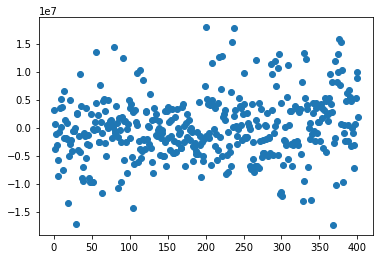

In [19]:
# Residual scatter plot
plt.plot(model_bk_Elim.resid, 'o')

Residual has constant variance

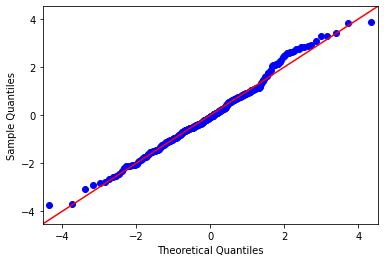

In [9]:
# QQ plot for normality
import scipy.stats as stats
fig = sm.qqplot(model_bk_Elim.resid, stats.t, fit=True, line="45")
plt.show()

Residual is normally distributed

In [10]:
#Breusch-Pagan Test for heteroscedasticity
lmvalue, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_breuschpagan(\
                                       model_bk_Elim.resid, X_Final)
print(f'lm_pvalue = {lm_pvalue:.3f}')
print(f'f_pvalue = {f_pvalue:.3f}')

lm_pvalue = 0.000
f_pvalue = 0.000


No heteroscedasticity

In [16]:
#RESET test for neglected nonlinearity
print(f'F test p_value = {sm.stats.diagnostic.linear_reset(model_bk_Elim,use_f = True).pvalue:.3f}')
print(f'Chi-sq p_value = {sm.stats.diagnostic.linear_reset(model_bk_Elim,use_f = False).pvalue:.3f}')

F test p_value = 0.000
Chi-sq p_value = 0.000


No neglected nonlinearity

In [12]:
players = pd.read_csv("players 2k20.csv")
players.theme.unique()

array(["'20 NBA", 'All-Star Flash', 'Buzzer Beater', 'Campus Legends',
       'Career Highlights', 'Fan Favorites', 'Fan Favorites 2', 'Flash',
       'Flash 2', 'Flash 4', 'Flash 5', 'Flash 6', 'Flash 7',
       'Free Agent', 'Frostbite', 'Glitched', 'GOAT Bird', 'GOAT Jordan',
       'GOAT Kareem', 'GOAT Magic', 'GOAT Rewards', 'Heat Check',
       'Leap Year', 'Legacy Series II: David Thompson',
       'Legacy Series II: Maurice Lucas',
       'Legacy Series II: Nate Thurmond',
       'Legacy Series II: Phil Chenier', 'Legacy Showcase',
       'Legacy Showcase Series II', 'Legacy: Bernard King',
       'Legacy: Bill Walton', 'Legacy: Earl Monroe',
       'Legacy: George Mikan', 'Legacy: Mark Price',
       'Legacy: Sidney Moncrief', 'Lights Out', 'Moments',
       'Moments of the Week 1', 'Moments of the Week 10',
       'Moments of the Week 11', 'Moments of the Week 2',
       'Moments of the Week 3', 'Moments of the Week 4',
       'Moments of the Week 5', 'Moments of the Week 6',

In [13]:
players_pred = players[players['theme']=="Spotlight Reward"].reset_index()
players_pred = players_pred.loc[:,['name','overall','standing_dunk','post_moves',\
                                   'acceleration','pick_and_roll_defense_iq']]
players_pred

,name,overall,standing_dunk,post_moves,acceleration,pick_and_roll_defense_iq
0,Gary Payton,89,25,85,86,84
1,Daniel Gibson,89,40,61,93,81
2,Buck Williams,89,95,84,50,70
3,Vernon Maxwell,88,25,45,80,76
4,Jeff Malone,86,55,64,80,80
5,Dennis Johnson,86,25,74,73,98
6,Gerald Wallace,85,35,50,84,92
7,Isiah Thomas,85,25,44,85,94
8,David Robinson,85,85,86,40,82
9,Clyde Drexler,84,65,70,85,92


In [14]:
pd.options.display.float_format = '${:,.0f}'.format
X_pred = players_pred.drop(['name'], axis=1)
X_pred = sm.add_constant(X_pred)
salary_pred = model_bk_Elim.predict(X_pred)
players_pred['salary_pred'] = salary_pred
result = players_pred[['name','salary_pred']]
result

,name,salary_pred
0,Gary Payton,"$32,258,338"
1,Daniel Gibson,"$27,642,781"
2,Buck Williams,"$25,277,871"
3,Vernon Maxwell,"$26,853,160"
4,Jeff Malone,"$23,156,765"
5,Dennis Johnson,"$30,198,507"
6,Gerald Wallace,"$24,131,868"
7,Isiah Thomas,"$24,896,041"
8,David Robinson,"$23,642,148"
9,Clyde Drexler,"$21,220,724"
